# Tarea 4 - Taller de Python para Ciencias de Datos
Por: Cristofer Alarcón, Felipe Espinoza y Francisco Salazar

## 1. Importar las librerías y datos a analizar.


Se importan las librerías necesarias

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se cargan los datos en un dataframe

In [2]:
df = pd.read_csv("datos_vehiculos_procesados.csv", skiprows=0, low_memory=False)
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,gastos-en-km/L,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0,24,25659.31696,0.285927,0.089753,Bajo,1,0,0
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0,24,14617.63522,0.285927,0.051130,Bajo,0,1,0
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0,24,20045.93904,0.285927,0.070118,Bajo,0,1,0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5,17,16833.69640,0.199703,0.058882,Bajo,0,1,0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0,20,2385.04188,0.241328,0.008343,Bajo,1,0,0
5,Fiesta,2015,10500,Manual,35432,Petrol,113.417932,47.9,1.6,20,57022.13488,0.237364,0.199455,Bajo,0,1,0
6,Puma,2019,22500,Manual,2029,Petrol,145.000000,50.4,1.0,21,3265.35086,0.249752,0.011422,Bajo,0,1,0
7,Fiesta,2017,9000,Manual,13054,Petrol,113.417932,54.3,1.2,23,21008.32436,0.269078,0.073484,Bajo,0,1,0
8,Kuga,2019,25500,Automatic,6894,Diesel,145.000000,42.2,2.0,17,11094.78996,0.209118,0.038808,Bajo,1,0,0
9,Focus,2018,10000,Manual,48141,Petrol,113.417932,61.4,1.0,26,77475.23694,0.304262,0.270997,Bajo,0,1,0


---

## 2. Analisis de las variables a seleccionar para modelar el problema.

Se revisan todas las correlaciones del dataframe.

In [3]:
df.corr()

,year,price,mileage,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
year,1.000000,0.636009,-0.707818,0.297275,-0.022967,-0.137311,-0.021447,-0.707818,-0.022967,-0.707818,0.036498,-0.037896,0.014022
price,0.636009,1.000000,-0.530659,0.406037,-0.346419,0.411178,-0.345217,-0.530659,-0.346419,-0.530659,0.208185,-0.258757,0.141278
mileage,-0.707818,-0.530659,1.000000,-0.259653,0.120075,0.215035,0.121924,1.000000,0.120075,1.000000,-0.050340,0.059756,-0.030114
tax,0.297275,0.406037,-0.259653,1.000000,-0.501936,0.184260,-0.496534,-0.259653,-0.501936,-0.259653,0.154757,-0.181456,0.089345
mpg,-0.022967,-0.346419,0.120075,-0.501936,1.000000,-0.260521,0.997657,0.120075,1.000000,0.120075,-0.235047,0.302291,-0.174106
engineSize,-0.137311,0.411178,0.215035,0.184260,-0.260521,1.000000,-0.254040,0.215035,-0.260521,0.215035,0.163889,-0.224341,0.140918
km/L,-0.021447,-0.345217,0.121924,-0.496534,0.997657,-0.254040,1.000000,0.121924,0.997657,0.121924,-0.234768,0.302214,-0.174306
km,-0.707818,-0.530659,1.000000,-0.259653,0.120075,0.215035,0.121924,1.000000,0.120075,1.000000,-0.050340,0.059756,-0.030114
km/LNorm,-0.022967,-0.346419,0.120075,-0.501936,1.000000,-0.260521,0.997657,0.120075,1.000000,0.120075,-0.235047,0.302291,-0.174106
kmNorm,-0.707818,-0.530659,1.000000,-0.259653,0.120075,0.215035,0.121924,1.000000,0.120075,1.000000,-0.050340,0.059756,-0.030114


Se muestra la correlación de las columnas de `precio` y `año`. 

In [4]:
df[['price', 'year']].corr()

,price,year
price,1.000000,0.636009
year,0.636009,1.000000


Se examinó la correlación entre las variables `year` y `price` (0,636) ya que, de todas las variables, el año (`year`) es la variable más correlacionada con el precio (`price`).

(0.0, 83531.3594263618)

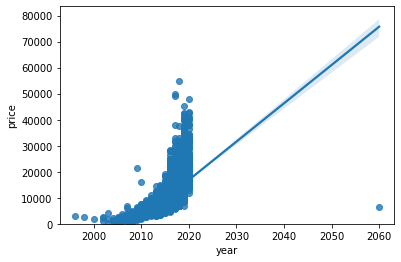

In [5]:
sns.regplot(x="year", y="price", data=df)
plt.ylim(0,)   
#Polinomial

A medida que aumenta el año, aumenta el precio: esto indica una **correlación directa/positiva** entre estas dos variables. El año parece un indicador bastante bueno del precio, ya que la línea de regresión es casi una línea diagonal perfecta.

### Correlación de Pearson

Se va a calcular el coeficiente de correlación de Pearson para analizar la relación lineal entre las variables

La información del **valor P** se puede obtener usando el módulo `stats` de la biblioteca `scipy`.

In [6]:
from scipy import stats

#### Año versus Precio

In [7]:
coeficiente_pearson, valor_p = stats.pearsonr(df['year'], df['price'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.636009340447421  con un valor de P = 0.0


**$\therefore $ Conclusión:**

Dado que el valor P es $<$ 0.001, la correlación entre el *año* y el *precio* es estadísticamente significativa, aunque la relación lineal no es especialmente fuerte (~0.636).

#### Millas por galón versus Kilómetros por litro

In [8]:
coeficiente_pearson, valor_p = stats.pearsonr(df['mpg'], df['km/L'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.9976571929553453  con un valor de P = 0.0


**$\therefore $ Conclusión:**

Dado que el valor P es $<$ 0.001, la correlación entre las *millas por galón* y los *kilómetros por litro* es estadísticamente significativa, y la relación lineal es muy extremadamente fuerte (~0.998, muy cercano a 1).

---

## 3. Modelos de regresión

### Modelo de Regresión Lineal Simple

Primero, se debe cargar el módulo para la regresión lineal.

In [9]:
from sklearn.linear_model import LinearRegression

Una vez cargado se procede a crear un objeto del tipo regresión lineal,  `LinearRegression()`.

In [10]:
lm = LinearRegression()
lm

LinearRegression()

#### ¿Cómo podría el consumo en millas por galón ayudar a predecir el precio de un automóvil?

Utilizando una regresión lineal simple, se creará una función lineal con `mpg` como la variable predictora y `price` como la variable de respuesta.

In [11]:
X = df[['mpg']]
Y = df['price']

Para ajustar el modelo lineal se utilizarán los datos de la variable `mpg`.

In [12]:
lm.fit(X,Y)

LinearRegression()

Ahora, se podría generar una predicción.

In [13]:
Y_hat=lm.predict(X)
Y_hat[0:5]

array([12313.10914046, 12313.10914046, 12313.10914046, 15135.57114904,
       13773.00328283])

Intersección $a$:

In [14]:
lm.intercept_

21672.652697634578

Pendiente $b$:

In [15]:
lm.coef_

array([-162.21046026])

**$\therefore $ Conclusión:**

Reemplazando los valores obtenidos en el modelo lineal con la estructura: $ \hat{Y} = a + b  X $, se obtiene la siguiente fórmula: $\hat{price} = 21672.65 - 162.21 \times mpg$.

#### Gráfico de Regresión Simple

(0.0, 58420.898906893126)

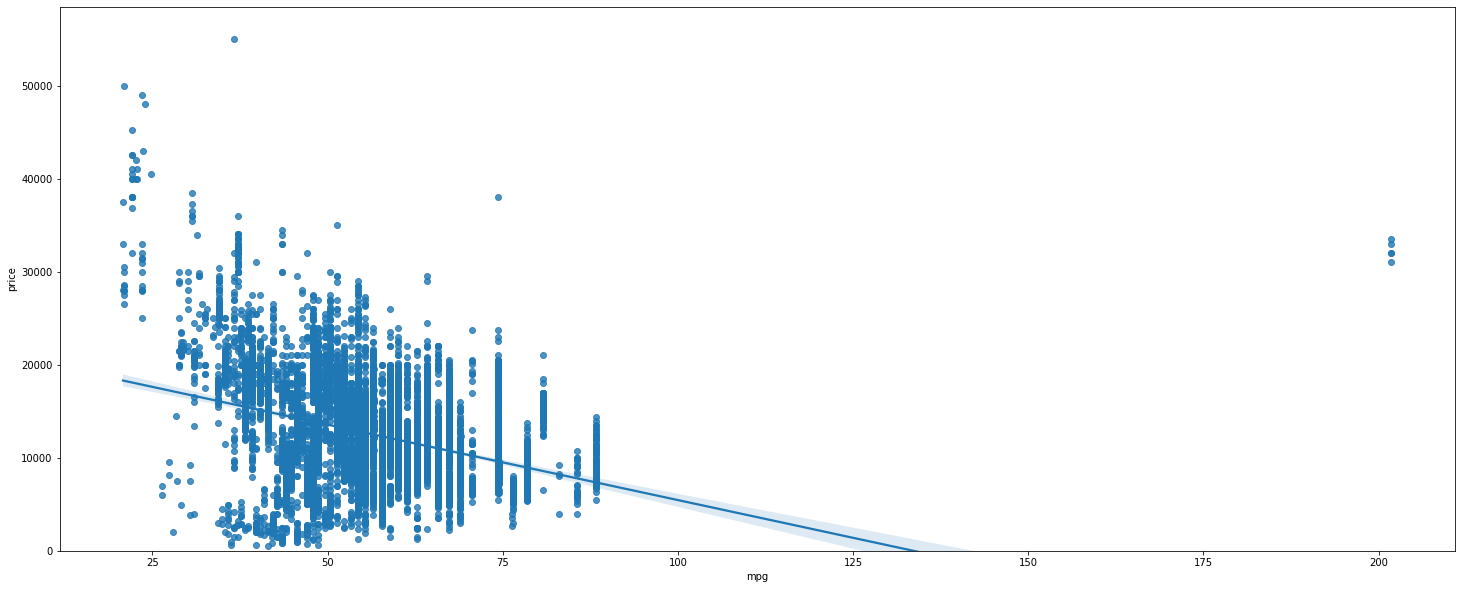

In [16]:
ancho = 25
alto = 10
plt.figure(figsize=(ancho, alto))
sns.regplot(x="mpg", y="price", data=df)
plt.ylim(0,)

De este gráfico se puede observar que el precio está negativamente correlacionado con el consumo de millas por galón, ya que la pendiente de la regresión es negativa.

Como los datos están demasiado alejados de la línea, este modelo lineal podría no ser el mejor modelo para estos datos. Por lo tanto, se graficó utilizando un gráfico de residuos:

#### Gráfico de Residuos

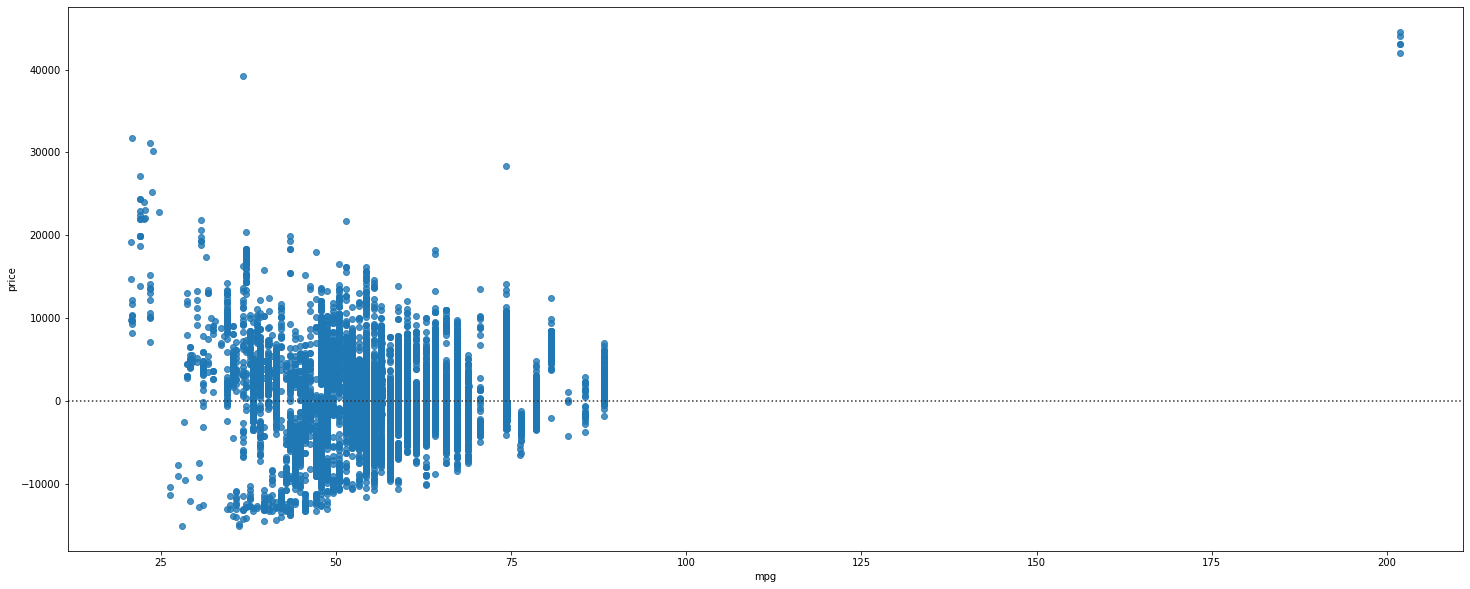

In [17]:
ancho = 25
alto = 10
plt.figure(figsize=(ancho, alto))
sns.residplot(x=df['mpg'], y=df['price'])
plt.show()

Se puede ver en este gráfico de residuos que los residuos no se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que tal vez un modelo no lineal sea más apropiado para estos datos.

#### Error de la Regresión Lineal Simple

Se debe importar la función **mean_squared_error** del módulo **metrics**:

In [18]:
from sklearn.metrics import mean_squared_error

Se ajusta el modelo

In [19]:
lm.fit(X, Y)

LinearRegression()

Se encuentra el $R^2$

In [20]:
print('El valor de R-cuadrado es: ', lm.score(X, Y))

El valor de R-cuadrado es:  0.1200064498669362


El valor entregado nos indica que el \~40.045% de la variación del precio se explica por el modelo lineal simple basado en `mpg`.

Ahora, se calculará el MSE.

Primero se debe predecir la salida, es decir, $\hat{y}$ usando el método de predicción, donde $X$ es la variable de entrada.

In [21]:
Y_hat=lm.predict(X)
print('La salida de los primeros cuatro valores de predicción es: ', Y_hat[0:4])

La salida de los primeros cuatro valores de predicción es:  [12313.10914046 12313.10914046 12313.10914046 15135.57114904]


 Ahora, se puede comparar los resultados previstos con los resultados reales. Recordar que un valor bajo de MSE indica que hay un mejor ajuste.

In [22]:
mse = mean_squared_error(df['price'], Y_hat)
print(mse)

19781452.810028087


Por lo tanto, el error cuadrático medio del precio y el precio pronosticado es ~19781453.

**$\therefore $ Conclusión:**

Finalmente, luego de todos los análisis, se probó que un modelo lineal simple no es el mejor tipo de modelo para este conjunto de datos, por lo que luego, se modeló utilizando un modelo de regresión lineal multiple y un gráfico de regresión múltiple

### Modelo de Regresión Lineal Multiple

Se van a analizar las variables `tax`, `mileage`, `engineSize` y `mpg`.

In [23]:
Z = df[['tax', 'mileage', 'engineSize', 'mpg']]

Se ajusta el modelo lineal utilizando las cuatro variables anteriores.

In [24]:
lm.fit(Z, df['price'])

LinearRegression()

Intersección $a$:

In [25]:
lm.intercept_

9703.459749685902

Valores de los coeficientes ($b_1$, $b_2$, $b_3$, $b_4$):

In [26]:
lm.coef_

array([ 8.88292558e+00, -1.45255848e-01,  5.43126318e+03, -4.10044034e+01])

##### Gráfico de Regresión Lineal Múltiple

In [27]:
Y_hat = lm.predict(Z)

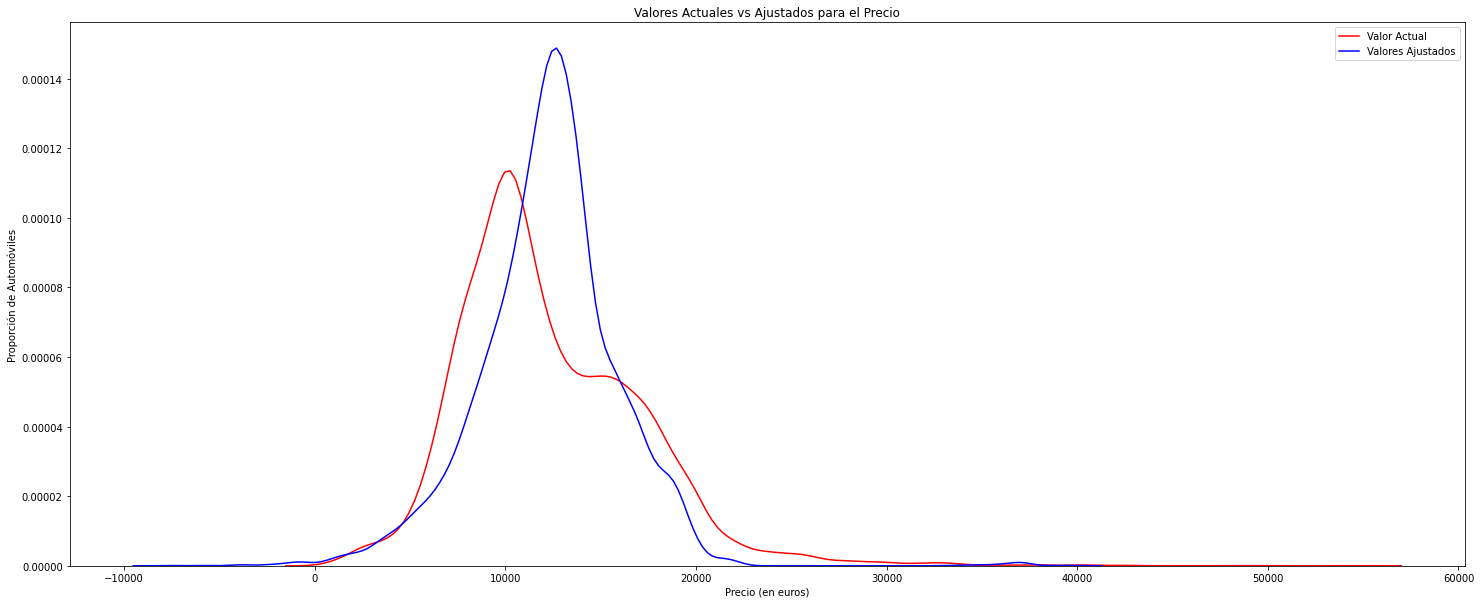

In [28]:
plt.figure(figsize=(ancho, alto))

ax1 = sns.kdeplot(df['price'], color="r", label="Valor Actual")
sns.kdeplot(Y_hat, color="b", label="Valores Ajustados" , ax=ax1)

plt.title('Valores Actuales vs Ajustados para el Precio')
plt.xlabel('Precio (en euros)')
plt.ylabel('Proporción de Automóviles')

plt.legend(loc='upper right')

plt.show()
plt.close()

Del gráfico se puede observar que los valores ajustados para las cuatro variables están algo alejadas de los valores reales.

#### Error de la Regresión Lineal Multiple

Se calculó el $R^2$ de la relación entre el impuesto (`tax`), el año (`year`), tamaño del motor (`engineSize`) y `Transmision automatica` con el precio (`price`) que ya se encuentra almacenado en la variable Z utilizando el modelo de regresión lineal multiple definido en el objeto lm.

Primero, se ajusta el modelo.

In [29]:
lm.fit(Z, df['price'])

LinearRegression()

Luego, se encuentra $R^2$.

In [30]:
print('El valor de R-cuadrado es: ', lm.score(Z, df['price']))

El valor de R-cuadrado es:  0.5976182261729129


 El valor entregado nos indica que el ~59.76% de la variación del precio se explica por el modelo lineal multiple basado en las variables ``tax``, ``year``, ``engineSize`` y ``Transmision automatica``.

Ahora, se calculará el MSE.

Primero se debe predecir la salida, es decir, $\hat{y}$ usando el método de predicción, donde $Z$ es la variable de entrada.

In [31]:
Y_hat_multi = lm.predict(Z)

Z = df[['tax', 'year', 'engineSize', 'Transmision Automatica']]

Luego, se puede proceder a comparar los resultados previstos con los resultados reales.

In [32]:
print(mean_squared_error(df['price'], Y_hat_multi))

9045175.466766015


Por lo tanto, el error cuadrático medio del precio y el precio pronosticado usando un multi ajuste es: ~9045175.

**$\therefore $ Conclusión:**

Finalmente, luego de todos los análisis, se probó que un modelo de regresión lineal múltiple tampoco es el mejor tipo de modelo para este conjunto de datos, por lo que, considerando también los resultados del modelo de regresión lineal simple, se puede concluir que un modelo no lineal puede resultar ser mejor para este set de datos.

---

### Modelo de Regresión Polinomial Simple

Como se mencionó anteriormente, un modelo lineal no proporcionaba el mejor ajuste al utilizar el atributo de millas por galón (`mpg`) como variable de predicción. Por lo tanto, se ajustarán los datos a un modelo polinomial.

#### Gráfico de Regresión Polinomial Simple

Se utilizará la siguiente función para graficar los datos:

In [33]:
def GraficaPolinomial(modelo, variable_independiente, variable_dependiente, Nombre):
    nuevo_x = np.linspace(15, 55, 100)
    nuevo_y = modelo(nuevo_x)

    plt.plot(variable_independiente, variable_dependiente, '.', nuevo_x, nuevo_y, '-')
    plt.title('Ajuste Polinomial con Matplotlib para Precio ~ ' + Nombre)
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    figura = plt.gcf()
    plt.xlabel(Nombre)
    plt.ylabel('Precio de los Automóviles')

    plt.show()
    plt.close()

Ahora hay que preparar las variables/parámetros de entrada.

In [34]:
x = df['mpg']
y = df['price']

El siguiente paso es ajustar el polinomio usando la función .polyfit(), luego se usará la función .poly1d() para mostrar la función polinomial.

In [35]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

          3         2
-0.03209 x + 12.19 x - 1244 x + 4.902e+04


Para visualizar los datos aplicados a la función polinomial generada se llamará a la función definida previamente, GraficaPolinomial.

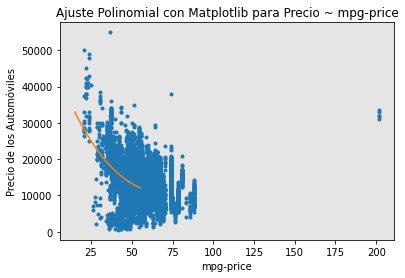

In [36]:
GraficaPolinomial(p, x, y, 'mpg-price')

In [37]:
np.polyfit(x, y, 3)

array([-3.20938932e-02,  1.21893050e+01, -1.24399328e+03,  4.90158843e+04])

**$\therefore $ Conclusión:**

Se puede observar en el gráfico que este modelo polinomial funciona mejor que el modelo lineal. Esto se debe a que la función polinomial generada acierta más puntos de datos.

#### Error de la Regresión polinomial

Se calculó el  $R^2$  de la relación entre las millas por galón (`mpg`) que ya se encuentra almacenado en la variable X y el precio `price` que ya se encuentra almacenado en la variable Y, utilizando la función de regresión polinomial definido en el objeto P.

Primero, se importa la función **r2_score** del módulo **metrics**, ya que se va a usar una función diferente.

In [38]:
from sklearn.metrics import r2_score

Ahora, se puede aplicar la función para obtener el valor de $R^2$:

In [39]:
r_cuadrado = r2_score(y, p(x))
print(r_cuadrado)

0.18836876910345624


El valor entregado nos indica que el ~18.84% de la variación del precio se explica por el modelo polinomial basado en mpg.

Luego, se debe calcular el MSE.

Para esto, los valores de $\hat{y}$  van a estar dados por la función P(x) donde  x  es la variable de entrada.

In [40]:
mean_squared_error(df['price'], p(x))

18244730.192280702

Por lo tanto, el error cuadrático medio del precio y el precio pronosticado es ~18244730.

### Modelo de Regresión Polinomial Múltiple